In [12]:
import pandas as pd
df = pd.read_csv('/content/ratings_Electronics (1).csv', sep=',', encoding='latin1', header=None)
print("Shape:", df.shape)
df.head()

Shape: (952849, 4)


,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1.365811e+09
1,A2CX7LUOHB2NDG,0321732944,5.0,1.341101e+09
2,A2NWSAGRHCP8N5,0439886341,1.0,1.367194e+09
3,A2WNBOD3WNDNKT,0439886341,3.0,1.374451e+09
4,A1GI0U4ZRJA8WN,0439886341,1.0,1.334707e+09


In [13]:
df.columns

Index([0, 1, 2, 3], dtype='int64')

In [14]:
df.columns = ['user_id', 'product_id', 'rating', 'timestamp']
df.head()

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1.365811e+09
1,A2CX7LUOHB2NDG,0321732944,5.0,1.341101e+09
2,A2NWSAGRHCP8N5,0439886341,1.0,1.367194e+09
3,A2WNBOD3WNDNKT,0439886341,3.0,1.374451e+09
4,A1GI0U4ZRJA8WN,0439886341,1.0,1.334707e+09


In [16]:
# Create sentiment labels based on rating values
def label_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

# Apply to dataset
df["sentiment"] = df["rating"].apply(label_sentiment)

# Preview
df.head(20)

,user_id,product_id,rating,timestamp,sentiment
0,AKM1MP6P0OYPR,0132793040,5.0,1.365811e+09,Positive
1,A2CX7LUOHB2NDG,0321732944,5.0,1.341101e+09,Positive
2,A2NWSAGRHCP8N5,0439886341,1.0,1.367194e+09,Negative
3,A2WNBOD3WNDNKT,0439886341,3.0,1.374451e+09,Neutral
4,A1GI0U4ZRJA8WN,0439886341,1.0,1.334707e+09,Negative
5,A1QGNMC6O1VW39,0511189877,5.0,1.397434e+09,Positive
6,A3J3BRHTDRFJ2G,0511189877,2.0,1.397434e+09,Negative
7,A2TY0BTJOTENPG,0511189877,5.0,1.395878e+09,Positive
8,A34ATBPOK6HCHY,0511189877,5.0,1.395533e+09,Positive
9,A89DO69P0XZ27,0511189877,5.0,1.395446e+09,Positive


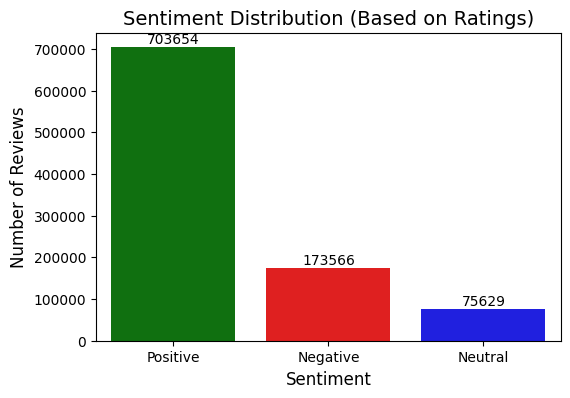

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count sentiment frequencies
sentiment_counts = df['sentiment'].value_counts()

# Define custom colors: Positive = green, Negative = red, Neutral = blue
colors = {
    'Positive': 'green',
    'Negative': 'red',
    'Neutral': 'blue'
}

# Create the bar chart
plt.figure(figsize=(6,4))
sns.barplot(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    hue=sentiment_counts.index,
    dodge=False,
    legend=False,
    palette=[colors[label] for label in sentiment_counts.index]
)

plt.title('Sentiment Distribution (Based on Ratings)', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

for i, val in enumerate(sentiment_counts.values):
    plt.text(i, val + 2000, str(val), ha='center', va='bottom', fontsize=10)

plt.show()

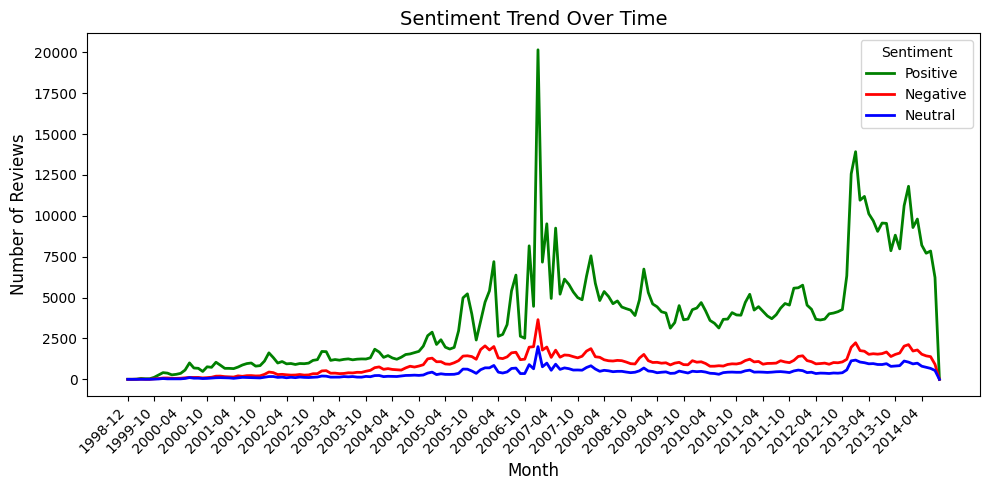

In [22]:
# Convert timestamp (seconds) to readable datetime
df['date'] = pd.to_datetime(df['timestamp'], unit='s')

# Extract Year-Month (for grouping)
df['month'] = df['date'].dt.to_period('M').astype(str)

# Group by Month + Sentiment, then count
trend = df.groupby(['month', 'sentiment']).size().reset_index(name='count')

# Pivot so each sentiment becomes a column
trend_pivot = trend.pivot(index='month', columns='sentiment', values='count').fillna(0)

# Sort by chronological order
trend_pivot = trend_pivot.sort_index()

# Plot trend lines
plt.figure(figsize=(10,5))

# Define sentiment colors
sentiment_colors = {
    'Positive': 'green',
    'Negative': 'red',
    'Neutral': 'blue'
}

# Plot each sentiment as a smooth line
for sentiment, color in sentiment_colors.items():
    if sentiment in trend_pivot.columns:
        plt.plot(trend_pivot.index, trend_pivot[sentiment],
                 color=color, label=sentiment, linewidth=2)

# Customize chart
plt.title('Sentiment Trend Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Show fewer x-axis labels for readability (every 6 months)
plt.xticks(range(0, len(trend_pivot.index), 6),
           trend_pivot.index[::6], rotation=45, ha='right')

plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()